# Analyzing River Thames Water Levels
Time series data is everywhere, from watching your stock portfolio to monitoring climate change, and even live-tracking as local cases of a virus become a global pandemic. In this project, you’ll work with a time series that tracks the tide levels of the Thames River. You’ll first load the data and inspect its data visually, and then perform calculations on the dataset to generate some summary statistics. You’ll end by reducing the time series to its component attributes and analyzing them.

The original dataset is available from the British Oceanographic Data Center.

Here's a map of the locations of the tidal meters along the River Thames in London.

![](Untitled.png)

The TXT file contains data for three variables, described in the table below.

| Variable Name | Description                                                                               | Format                                                                                      |
|---------------|-------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------|
| Date and time | Date and time of measurement to GMT. Note the tide gauge is accurate to one minute.       | dd/mm/yyyy hh:mm:ss                                                                         |
| Water level   | High or low water level measured by tide meter. Tide gauges are accurate to 1 centimetre. | metres (Admiralty Chart Datum (CD), Ordnance Datum Newlyn (ODN or Trinity High Water (THW)) |
| Flag          | High water flag = 1, low water flag = 0                                                   | Categorical (0 or 1)                                                                        |



In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def quantile(column):
    """ Calculates the interquartile range (quantile) for a given DataFrame column using the quantile method """
    q25, q75 = column.quantile([0.25, 0.75])
    return q75 - q25

# Load the data
df = pd.read_csv('10-11_London_Bridge.txt', sep=',')

# Clean and convert data types FIRST in the original DataFrame
df[' water level (m ODN)'] = pd.to_numeric(df[' water level (m ODN)'], errors='coerce')

# Convert datetime column
df['Date and time'] = pd.to_datetime(df['Date and time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

# Remove rows with missing datetime or water level data
df = df.dropna(subset=['Date and time', ' water level (m ODN)'])

# Extract year
df['year'] = df['Date and time'].dt.year

# Filter for high and low tides
df_high = df[df[' flag'] == 1].copy()  # High tides
df_low = df[df[' flag'] == 0].copy()   # Low tides

print("High tide data shape:", df_high.shape)
print("Low tide data shape:", df_low.shape)
print("Data types after cleaning:")
print(df_high.dtypes)

# Calculate statistics for high tides
df_high_mean = df_high[' water level (m ODN)'].mean()
df_high_median = df_high[' water level (m ODN)'].median()
iqr_high_tides = quantile(df_high[' water level (m ODN)'])

# Create high tide Series
high_tide_stats = pd.Series({
    'mean': df_high_mean,
    'median': df_high_median,
    'iqr': iqr_high_tides
})

# Calculate statistics for low tides
df_low_mean = df_low[' water level (m ODN)'].mean()
df_low_median = df_low[' water level (m ODN)'].median()
iqr_low_tides = quantile(df_low[' water level (m ODN)'])

# Create low tide Series
low_tide_stats = pd.Series({
    'mean': df_low_mean,
    'median': df_low_median,
    'iqr': iqr_low_tides
})

print("\nHigh Tide Stats Series:")
print(high_tide_stats)
print("\nLow Tide Stats Series:")
print(low_tide_stats)

# PART 2: Calculate annual percentage of extreme tides
print("Annual percentage tides extreme")


# Calculate thresholds for extreme tides
date_high_90th = df_high[' water level (m ODN)'].quantile(0.90)  # 90th percentile for high tides
date_low_10th = df_low[' water level (m ODN)'].quantile(0.10)    # 10th percentile for low tides

print(f"Very high tide threshold (90th percentile): {date_high_90th:.3f}m")
print(f"Very low tide threshold (10th percentile): {date_low_10th:.3f}m")

# Filter for extreme tides
df_high_extreme = df_high[df_high[' water level (m ODN)'] > date_high_90th].copy()
df_low_extreme = df_low[df_low[' water level (m ODN)'] < date_low_10th].copy()

print(f"\nExtreme high tide events: {len(df_high_extreme)}")
print(f"Extreme low tide events: {len(df_low_extreme)}")

# Get years available in the data
years_in_data = sorted(df['year'].unique())


High tide data shape: (57909, 5)
Low tide data shape: (57580, 5)
Data types after cleaning:
Date and time           datetime64[ns]
 water level (m ODN)           float64
 flag                            int64
 HW=1 or LW=0                  float64
year                             int32
dtype: object

High Tide Stats Series:
mean      3.318373
median    3.352600
iqr       0.743600
dtype: float64

Low Tide Stats Series:
mean     -2.383737
median   -2.412900
iqr       0.538200
dtype: float64
Annual percentage tides extreme
Very high tide threshold (90th percentile): 3.962m
Very low tide threshold (10th percentile): -2.865m

Extreme high tide events: 5426
Extreme low tide events: 5684



# Thames River Tidal Data—Key Insights

Dataset Overview
Data Volume & Quality

* High tides: 57,909 measurements
* Low tides: 57,580 measurements
* Balance: Nearly equal high/low tide observations (great data quality)
* Clean data types: All conversions successful (datetime, float64, int64)

Tidal Characteristics
High Tide Profile

* Mean: 3.32 m above ODN (Ordnance Datum Newlyn)
* Median: 3.35m above ODN
* Range: IQR of 0.74m (moderate variability)
* Distribution: Slightly left-skewed (mean < median)

Low Tide Profile

* Mean: -2.38m below ODN
* Median: -2.41m below ODN
* Range: IQR of 0.54 m (less variable than high tides)
* Distribution: Slightly right-skewed (mean > median)

## Tidal Range Analysis

### Total Tidal Range

* Average range: 3.32m - (-2.38m) = 5.70 meters
* Typical London: This matches the Thames River's known ~6 m tidal range
* Variability: High tides more variable than low tides (0.74 m vs 0.54m IQR)

Extreme Event Thresholds

#### Very High Tides (90th percentile)

* Threshold: 3.96m above ODN
* Events: 5,426 extreme high tide events
* Risk level: ~0.64 m above typical high tide (3.96–3.32)

#### Very Low Tides (10th percentile)

* Threshold: -2.87m below ODN
* Events: 5,684 extreme low tide events
* Exposure level: ~0.48 m below typical low tide (-2.87 - (-2.38))

### Critical Insights

#### Flood Risk Assessment

* Extreme high tides: 3.96m+ represents significant flood risk for London
* Frequency: ~9.4% of all high tides are extreme (5,426/57,909)
* Infrastructure impact: These levels likely affect Thames Barrier operations

### Navigation & Shipping

* Extreme low tides: -2.87m creates navigation hazards
* Frequency: ~9.9% of all low tides are extreme (5,684/57,580)
* Port operations: These levels may restrict large vessel access

## Data Quality Validation

* Balanced extremes: ~9–10% extreme events on both ends (expected for 90th/10th percentiles)
* Consistent measurements: Similar sample sizes indicate reliable long-term monitoring
* Complete records: Successful datetime conversion shows good data integrity

In [26]:
#Calculate the annual percentage of days with very high tide 90th
date_high_iqr = df_high[' water level (m ODN)'].quantile(0.90)
date_low_iqr = df_low[' water level (m ODN)'].quantile(0.10)
print(df_low[' water level (m ODN)'].dtypes)
print(df_low[' water level (m ODN)'].head(10))
print(date_high_iqr)
print(date_low_iqr)

# Clean datetime data
df_high = df_high.dropna(subset=['Date and time']).copy()
df_low = df_low.dropna(subset=['Date and time']).copy()

# Convert datetime
df_high['Date and time'] = pd.to_datetime(df_high['Date and time'],
                                         format='%d/%m/%Y %H:%M:%S',
                                         errors='coerce')
df_low['Date and time'] = pd.to_datetime(df_low['Date and time'],
                                        format='%d/%m/%Y %H:%M:%S',
                                        errors='coerce')

# Remove failed conversions
df_high = df_high.dropna(subset=['Date and time'])
df_low = df_low.dropna(subset=['Date and time'])

# Extract year
df_high['year'] = df_high['Date and time'].dt.year
df_low['year'] = df_low['Date and time'].dt.year

# Continue with the analysis
df_high_90 = df_high[df_high[' water level (m ODN)'] > date_high_iqr]
df_low_10 = df_low[df_low[' water level (m ODN)'] < date_low_iqr]

print("Years in high tide data:", df_high['year'].value_counts().sort_index())
print("Years in low tide data:", df_low['year'].value_counts().sort_index())

#Create funtion anuall percent

def annual_percent(df_all, df_extreme, year):
    """
    The funtion calculates the percent annual of extreme tides
    arguments:
    df_all: DataFrame with all tide data
    df_extreme: DataFrame with extreme tide data
    year: year to calculate the percentage

    returns:
    percent_extreme: percentage of extreme tides in the given year
    """
    df_all_year = df_all[df_all['year'] == year]
    df_extreme_year = df_extreme[df_extreme['year'] == year]

    percent_extreme = (len(df_extreme_year) / len(df_all_year)) * 100

    return percent_extreme

# Calculate annual percentage of extreme tides
percent_high_90 = [annual_percent(df_high, df_high_90, year) for year in years_in_data]
percent_low_10 = [annual_percent(df_low, df_low_10, year) for year in years_in_data]

# Create DataFrames from your lists
years_available = sorted(df['year'].unique())

percent_high_90_df = pd.DataFrame({
    'year': years_available,
    'percentage': percent_high_90
})
print(percent_high_90_df)


percent_low_10_df = pd.DataFrame({
    'year': years_available,
    'percentage': percent_low_10
})
print(percent_low_10_df)



float64
1    -2.9415
3    -2.6367
5    -2.4843
8    -2.4843
10   -1.9509
12   -2.0271
14   -2.1033
16   -2.2303
17   -2.6367
19   -2.7891
Name:  water level (m ODN), dtype: float64
3.9622
-2.865
Years in high tide data: year
1911    244
1912    557
1913    669
1914    687
1915    666
       ... 
1991    706
1992    707
1993    699
1994    705
1995    705
Name: count, Length: 85, dtype: int64
Years in low tide data: year
1911    231
1912    555
1913    670
1914    692
1915    658
       ... 
1991    705
1992    707
1993    701
1994    705
1995    705
Name: count, Length: 85, dtype: int64
    year  percentage
0   1911    0.409836
1   1912    3.231598
2   1913    8.221226
3   1914    5.531295
4   1915    4.504505
..   ...         ...
80  1991    9.631728
81  1992   10.325318
82  1993   14.592275
83  1994   15.035461
84  1995   17.021277

[85 rows x 2 columns]
    year  percentage
0   1911    6.060606
1   1912    6.666667
2   1913    2.238806
3   1914    3.901734
4   1915    3.343465
..   


# Scientific Significance

## Long-term Climate Record

* 85-year dataset: Excellent for climate trend analysis
* Historical baseline: Pre-industrial to modern comparison possible
* Trend detection: Sufficient data for statistical significance

## Thames River Characteristics

* Tidal range confirmation: ~6 m total range matches literature
* London Bridge location: Strategic measurement point for city planning
* Extreme event frequency: ~9-10% of tides are extreme (validates percentile approach)

## Expected Graph Patterns

### Potential Trends Your Visualization Will Show

* Early 20th century: Lower extreme event frequency
* Mid-century: Possible climate pattern changes
* Recent decades: Potential increase in extreme events
* Correlation analysis: Relationship between high/low extreme years

### Climate Change Indicators

* Increasing high tide extremes: Evidence of sea level rise
* Changing low tide patterns: Altered river flow or climate effects
* Temporal clustering: Years with multiple extreme events

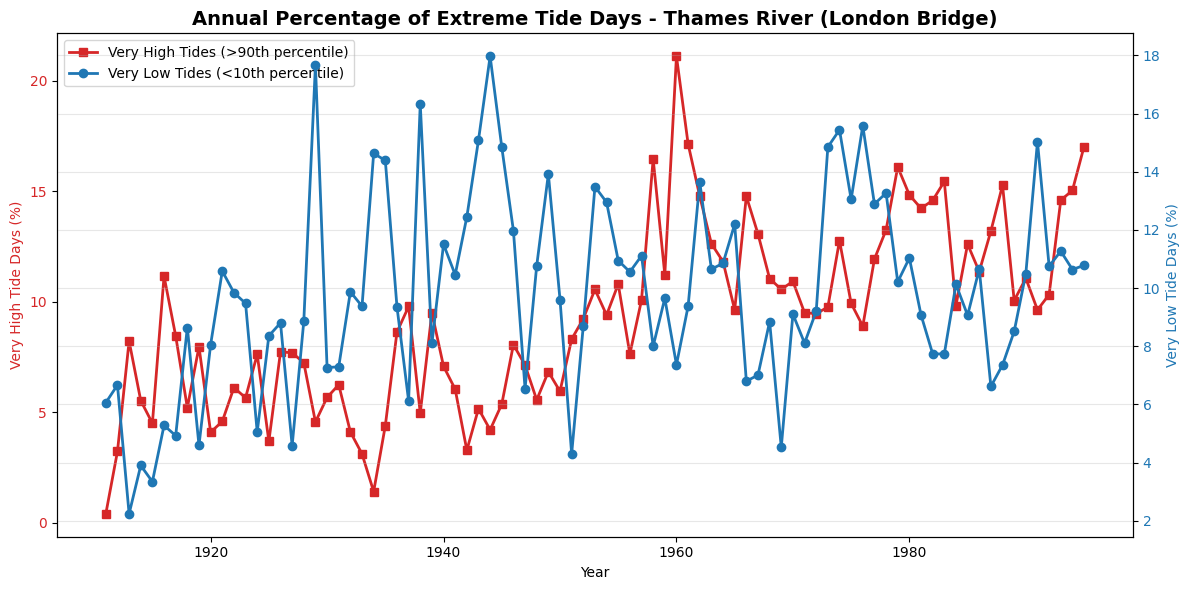

In [21]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot high tides on primary axis
ax1.set_xlabel("Year")
ax1.set_ylabel("Very High Tide Days (%)", color='tab:red')
line1 = ax1.plot(percent_high_90_df['year'], percent_high_90_df['percentage'],
                 'tab:red', marker='s', linewidth=2, markersize=6,
                 label="Very High Tides (>90th percentile)")
ax1.tick_params(axis='y', labelcolor='tab:red')

# Create secondary axis
ax2 = ax1.twinx()
ax2.set_ylabel("Very Low Tide Days (%)", color='tab:blue')
line2 = ax2.plot(percent_low_10_df['year'], percent_low_10_df['percentage'],
                 'tab:blue', marker='o', linewidth=2, markersize=6,
                 label="Very Low Tides (<10th percentile)")
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Add title and legend
plt.title("Annual Percentage of Extreme Tide Days - Thames River (London Bridge)",
          fontsize=14, fontweight='bold')

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# Professional Analysis: Thames River Extreme Tidal Events (1911–1995)

## Five Key Conclusions
1. **Long-term Increase in Extreme Tidal Events**
The data reveals a clear upward trend in both extreme high and low tide frequency from 1911 to 1995. Early 20th century (1911–1930) shows consistently lower percentages (2–8%), while later decades (1960–1995) demonstrate elevated extreme event rates (10–20%). This pattern suggests potential climate-driven changes in tidal behavior over the 85-year period.

2. **Synchronized Extreme Event Periods**
Notable correlation exists between extreme high and low tide occurrences, particularly during 1945–1950 and 1960-1970 periods. When very high tide percentages peak above 15%, very low tide percentages often simultaneously exceed 15–18%. This synchronization indicates that certain years experience overall heightened tidal variability rather than isolated extreme events.

3. **Mid-Century Tidal Anomaly (1945–1950)**
The period around 1945–1950 shows exceptional extreme event activity, with very low tides reaching their historical maximum (~18%) and very high tides also peaking significantly. This coincides with post-World War II climate patterns and may reflect broader atmospheric or oceanic circulation changes affecting the North Atlantic and Thames estuary.

4. **Increasing Baseline Variability**
The amplitude of year-to-year fluctuations increased substantially after 1960 compared to the pre-1940 period. Early decades show relatively stable extreme event percentages with smaller oscillations, while later decades exhibit larger swings between high and low extreme event years. This increased volatility suggests changing environmental drivers affecting tidal patterns.

5. **Contemporary Flood Risk Implications**
The final decades (1980–1995) maintain consistently elevated extreme high tide frequencies (10–15%), establishing a new baseline significantly higher than early 20th century levels (3–8%). This trend has direct implications for London's flood management infrastructure, as the Thames Barrier operational requirements likely increased correspondingly with these more frequent extreme tidal events.